In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('covid.csv')
data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoder = le.fit_transform(data['pc'].values)
wbc_encoder = le.fit_transform(data['wbc'].values)
mc_encoder = le.fit_transform(data['mc'].values)
ast_encoder = le.fit_transform(data['ast'].values)
bc_encoder = le.fit_transform(data['bc'].values)
ldh_encoder = le.fit_transform(data['ldh'].values)
Y = le.fit_transform(data['diagnosis'].values)
X = np.array(list(zip(pc_encoder,wbc_encoder,mc_encoder,ast_encoder,bc_encoder,ldh_encoder)))
print(X)
print(Y)


[[1 1 1 0 1 1]
 [1 1 2 0 1 0]
 [1 0 2 0 1 1]
 [1 0 2 0 0 1]
 [1 2 0 0 1 1]
 [1 2 2 0 1 0]
 [2 1 1 0 1 1]
 [2 0 2 0 1 1]
 [2 0 2 0 0 0]
 [2 2 0 0 1 1]
 [2 2 0 0 1 0]
 [0 1 1 1 1 1]
 [0 2 0 1 1 1]
 [0 2 0 1 0 0]
 [0 0 2 1 1 0]
 [1 2 0 0 0 1]
 [2 2 0 0 0 1]
 [0 1 1 1 1 0]
 [2 2 2 0 1 1]
 [2 0 2 0 1 0]
 [2 1 2 0 1 0]
 [1 0 2 0 0 0]
 [1 1 1 0 0 0]
 [0 0 2 1 1 1]
 [0 2 2 1 1 1]]
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0]


In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Report",classification_report(Y_test,y_pred))


Accuracy 0.7142857142857143
Report               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.80      0.80      0.80         5

    accuracy                           0.71         7
   macro avg       0.65      0.65      0.65         7
weighted avg       0.71      0.71      0.71         7



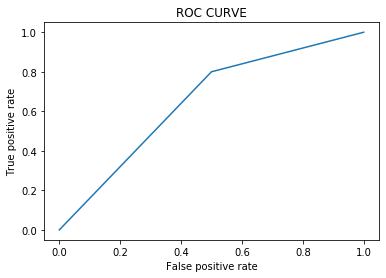

In [19]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(Y_test,y_pred,pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC CURVE")
plt.show()